# Análisis Exploratorio de datos(EDA)

### Importación de librerias

In [17]:
import pandas as pd  # Librería para manipulación de datos
import numpy as np   # Librería para cálculos matemáticos
import plotly as pl  # Librería para visualización de datos
import matplotlib.pyplot as plt # Librería para visualización de datos
import seaborn as sns # Librería para visualización de datos
import sklearn as skl # Librería para crear,entrenar y evaluar modelos de ML
import optuna as opt # Librería para busqueda automáticas de hiperparámetros de modelos ML

### Carga del dataset limpio    

In [18]:
df = pd.read_csv('data/clean_data.csv')

# separacion de datos entre setas edibles(e) y venenosas(p)

C:\Users\Fran\AppData\Local\Temp\ipykernel_14996\719586210.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='class', palette=palette_colors)


Text(0, 0.5, 'Cantidad de Muestras')

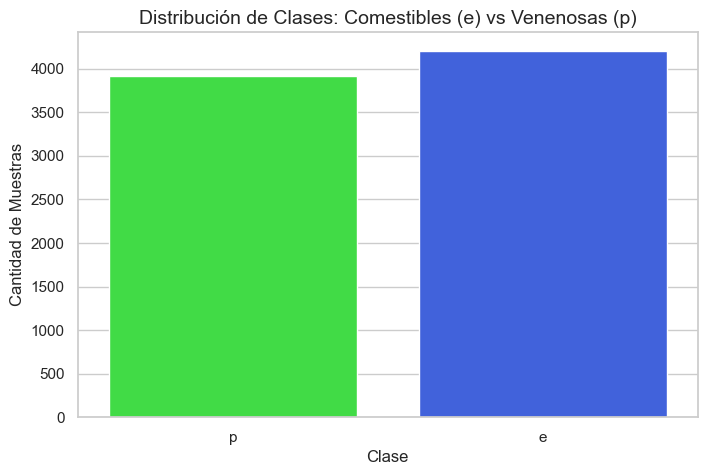

In [21]:
sns.set_theme(style="whitegrid")
palette_colors = {'e': '#2754F5', 'p': '#27F52E'}
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='class', palette=palette_colors)
plt.title('Distribución de Clases: Comestibles (e) vs Venenosas (p)', fontsize=14)
plt.xlabel('Clase')
plt.ylabel('Cantidad de Muestras')

# totales de datos entre setas edibles(e) y venenosas(p)

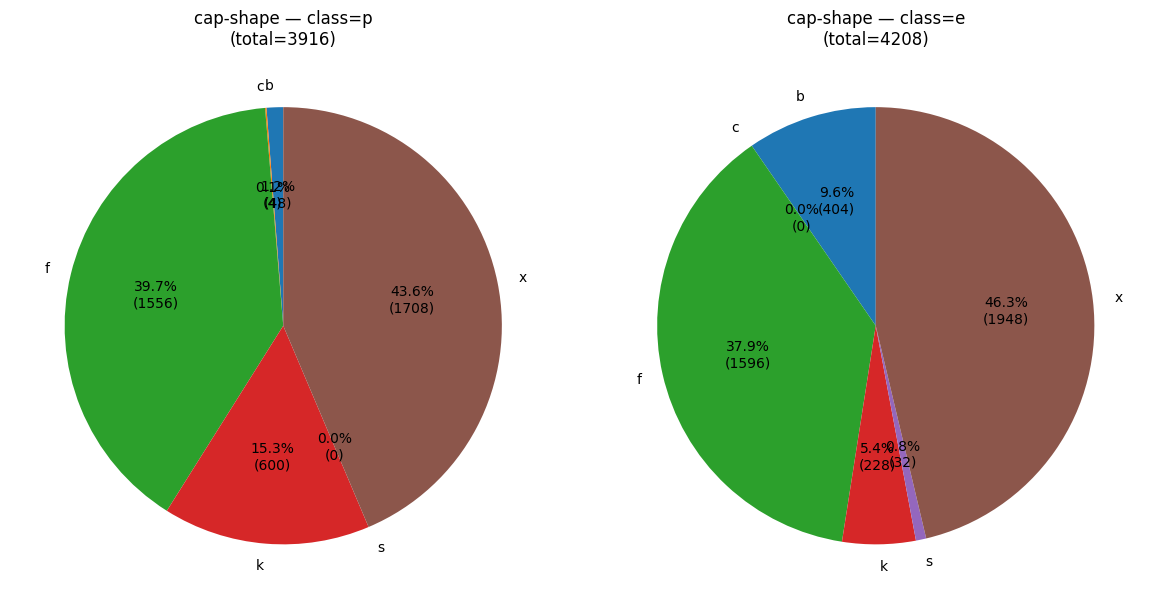

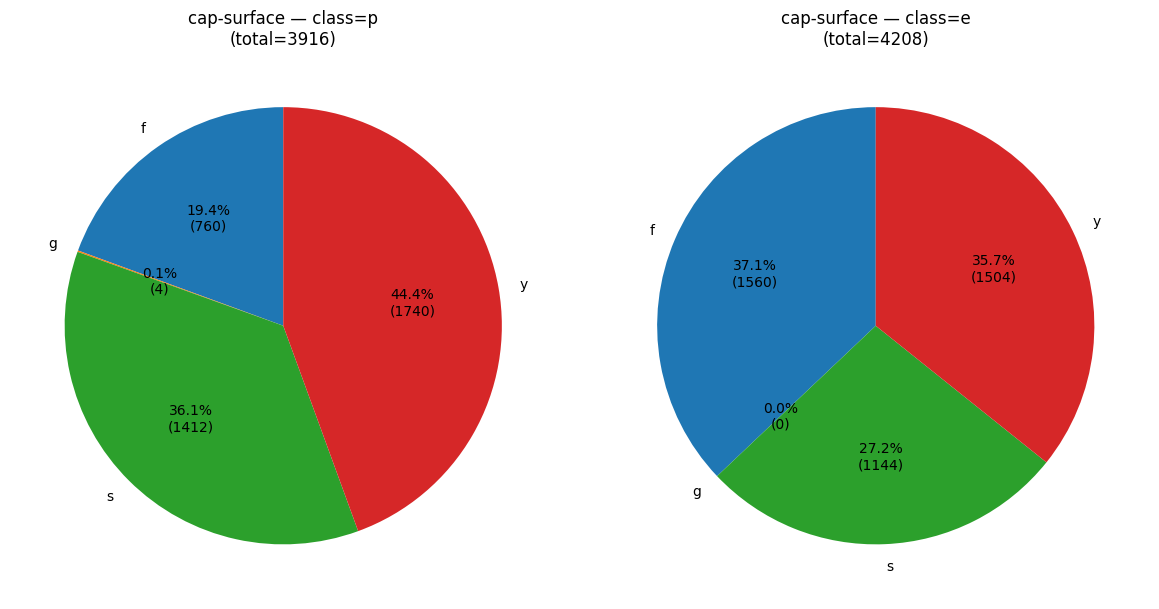

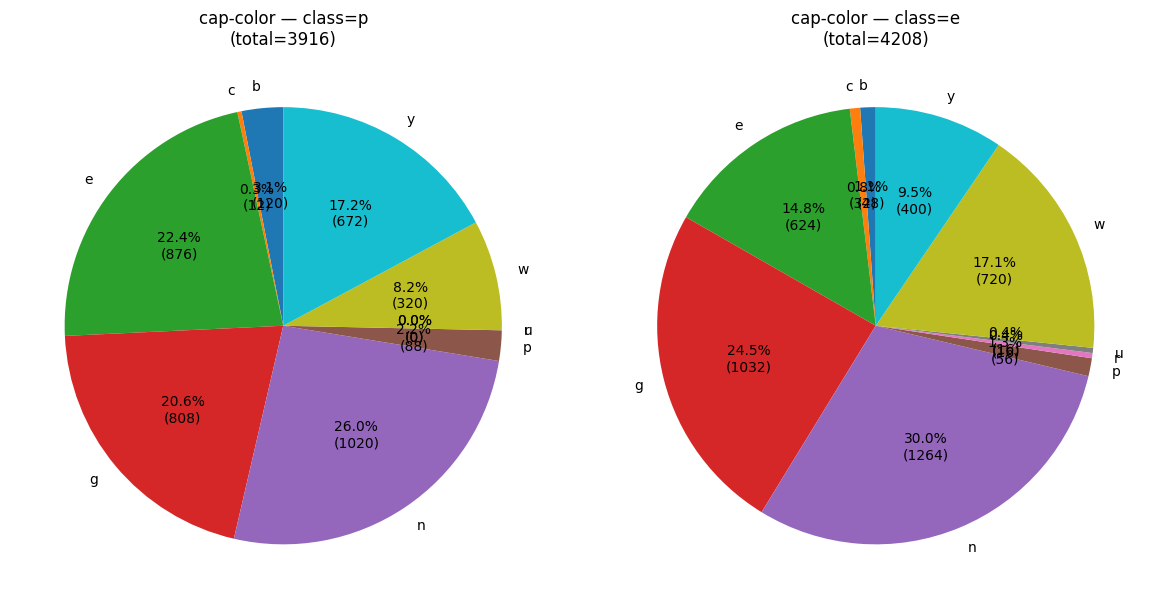

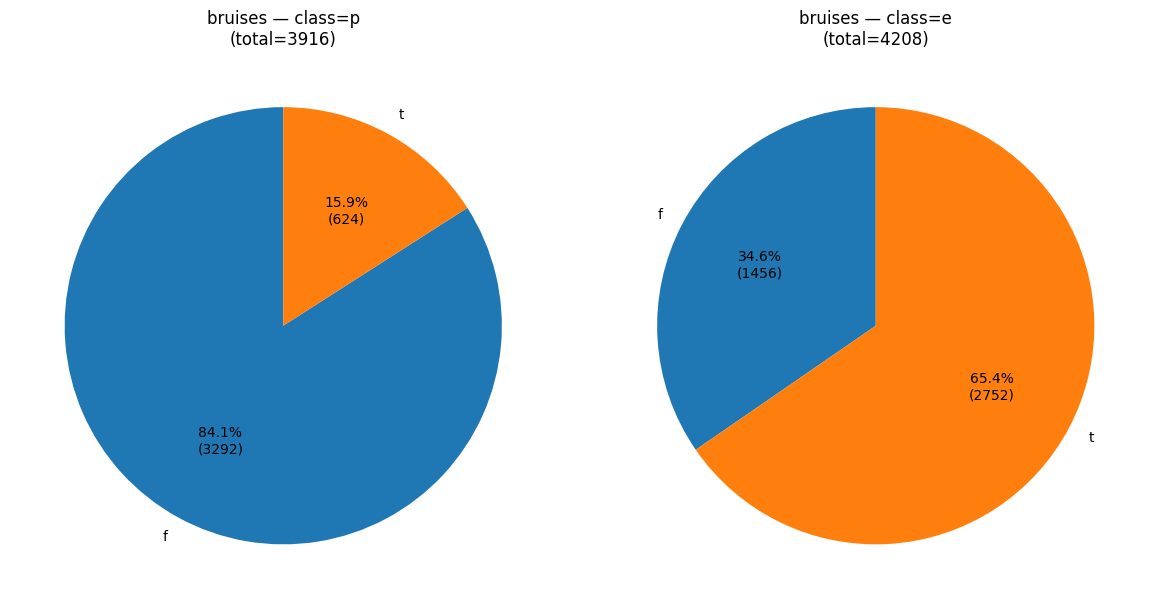

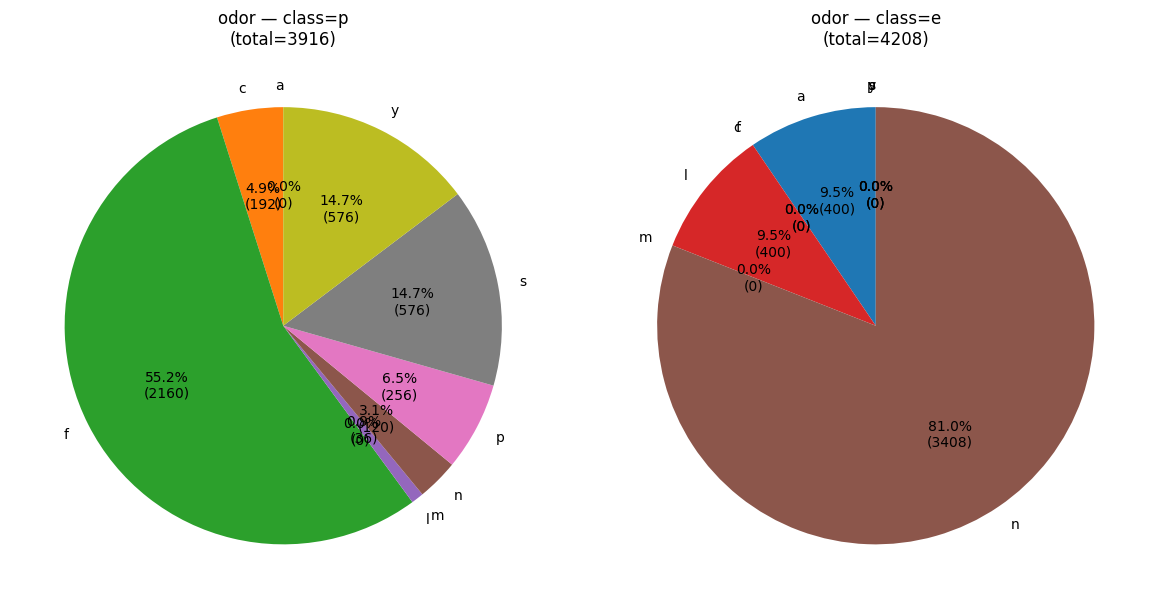

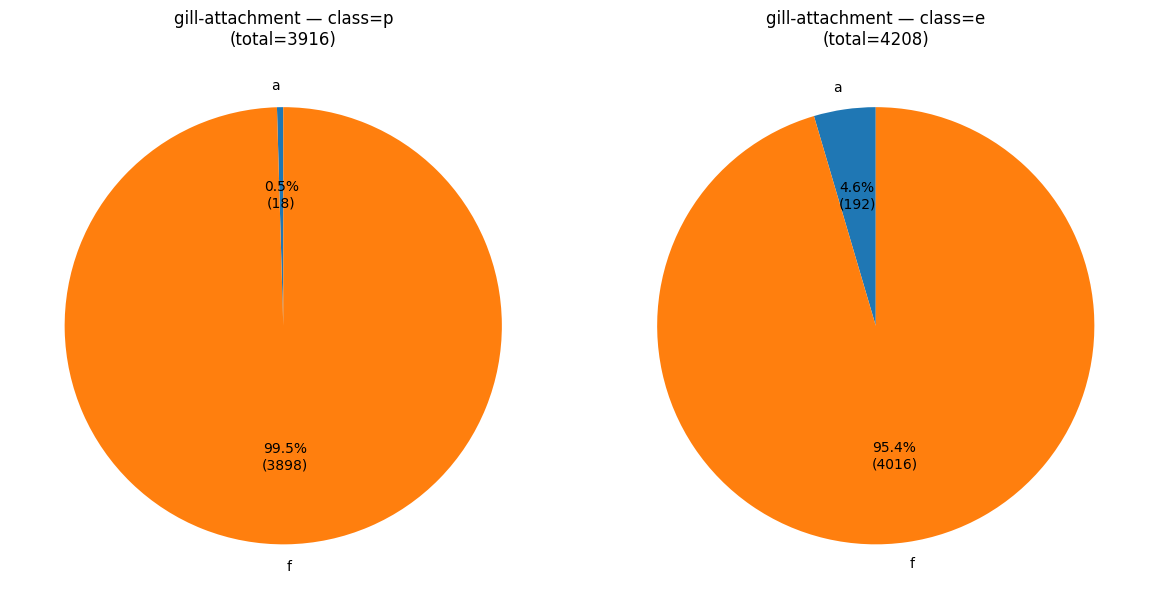

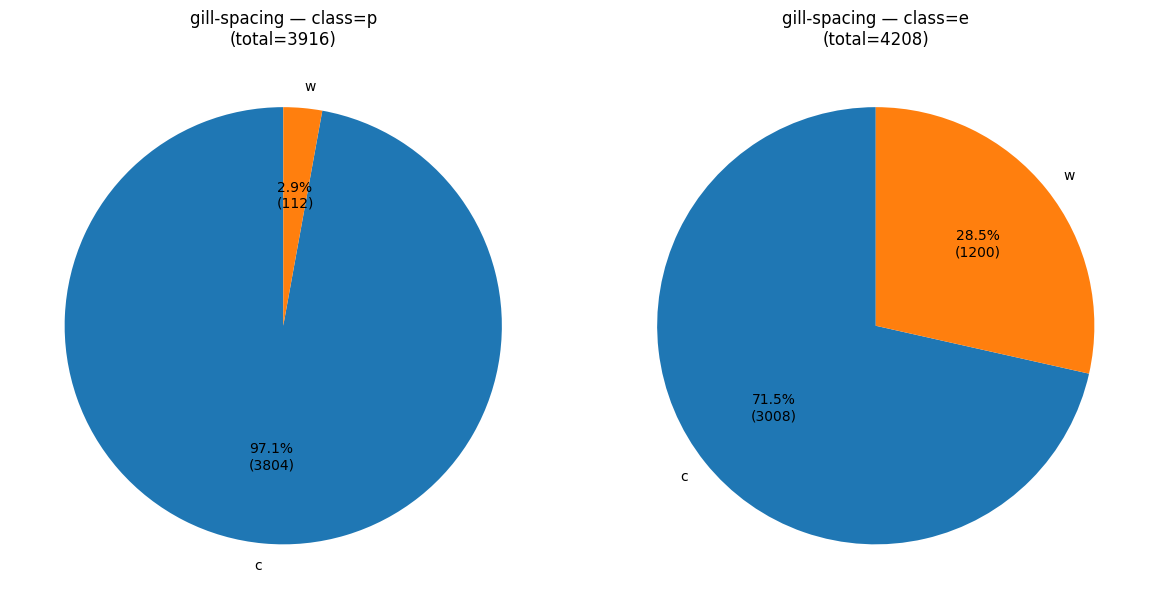

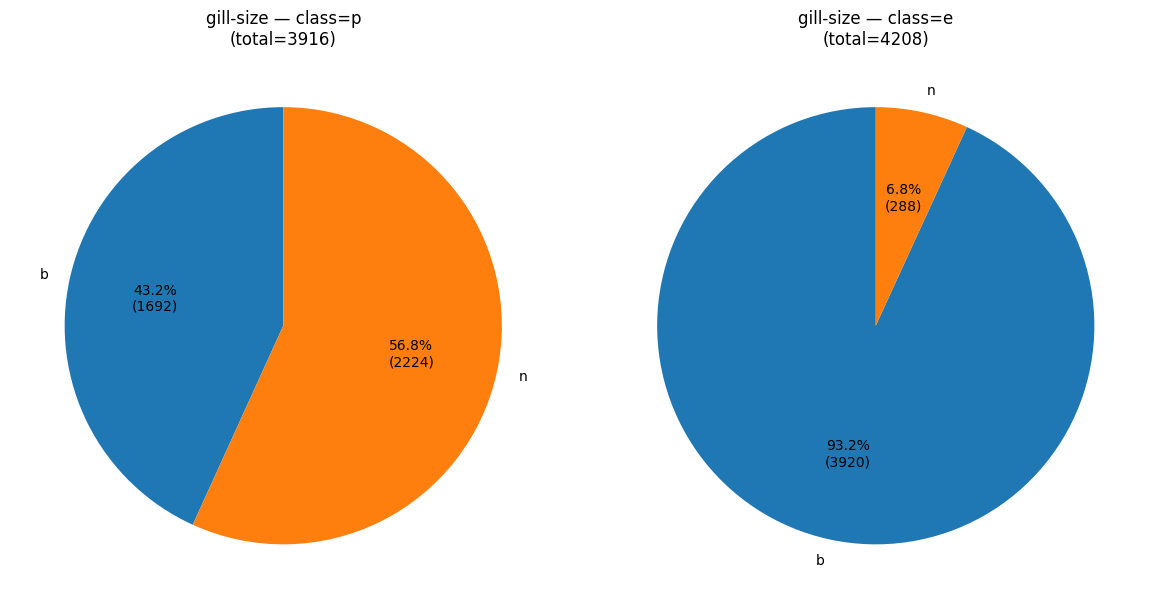

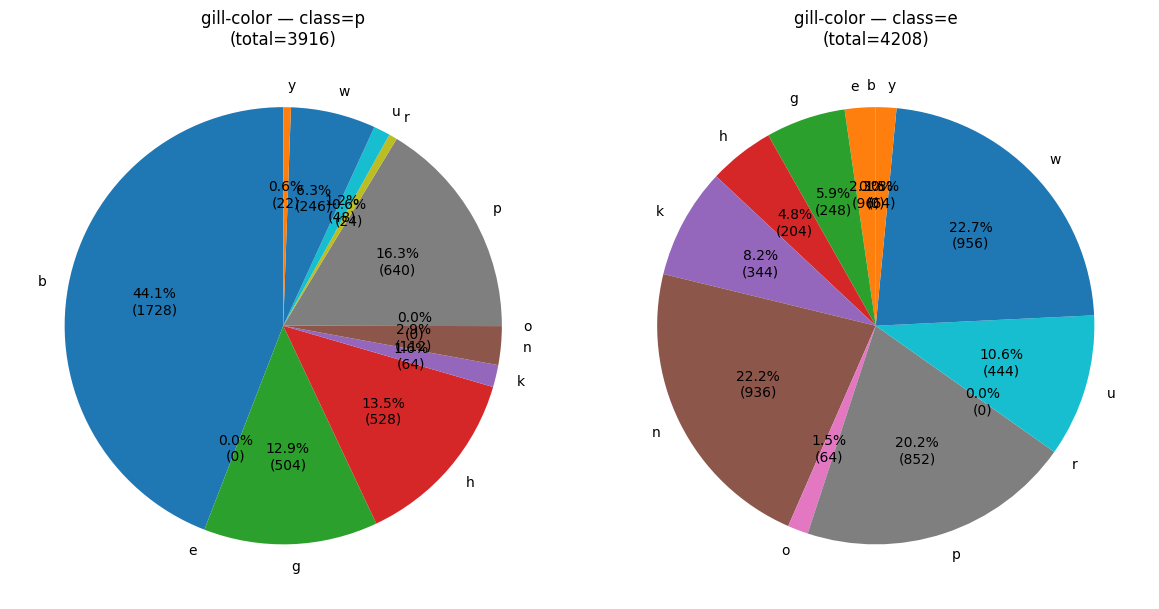

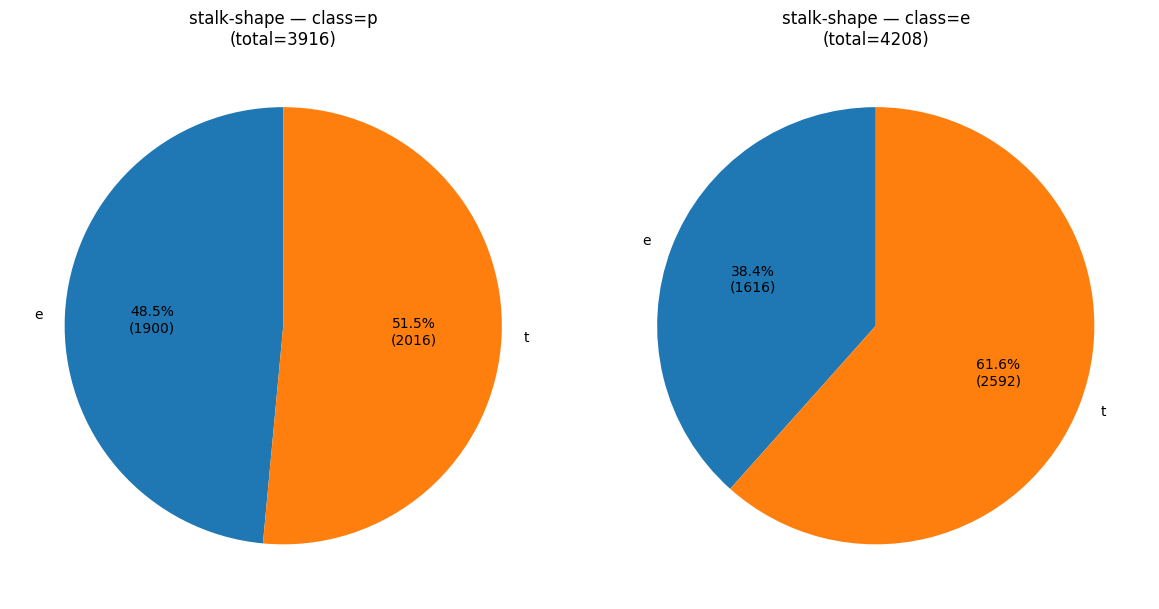

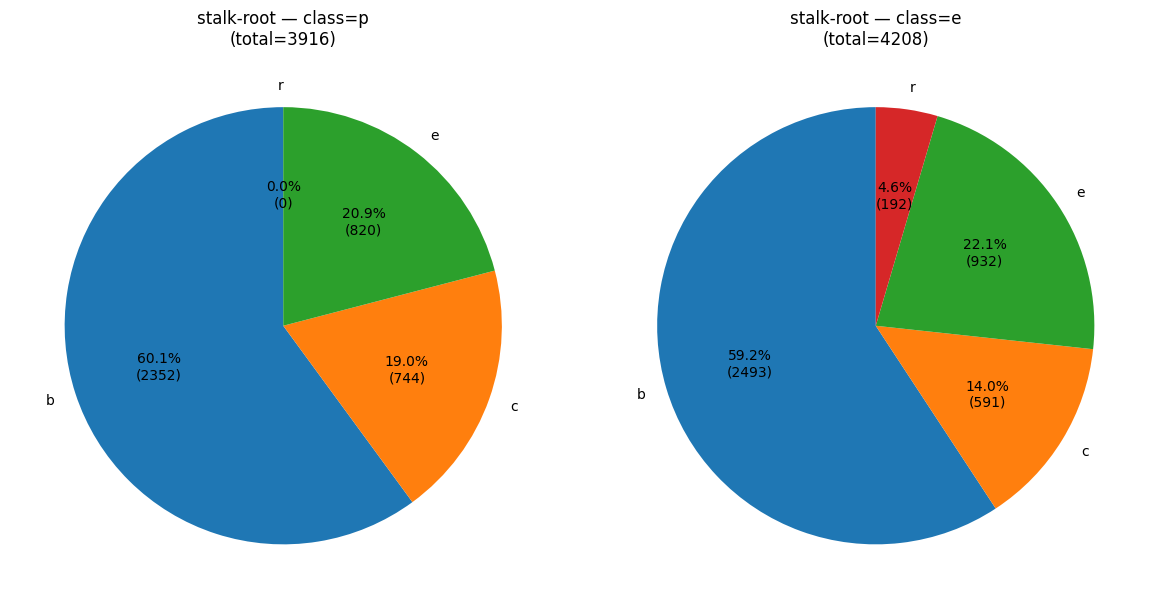

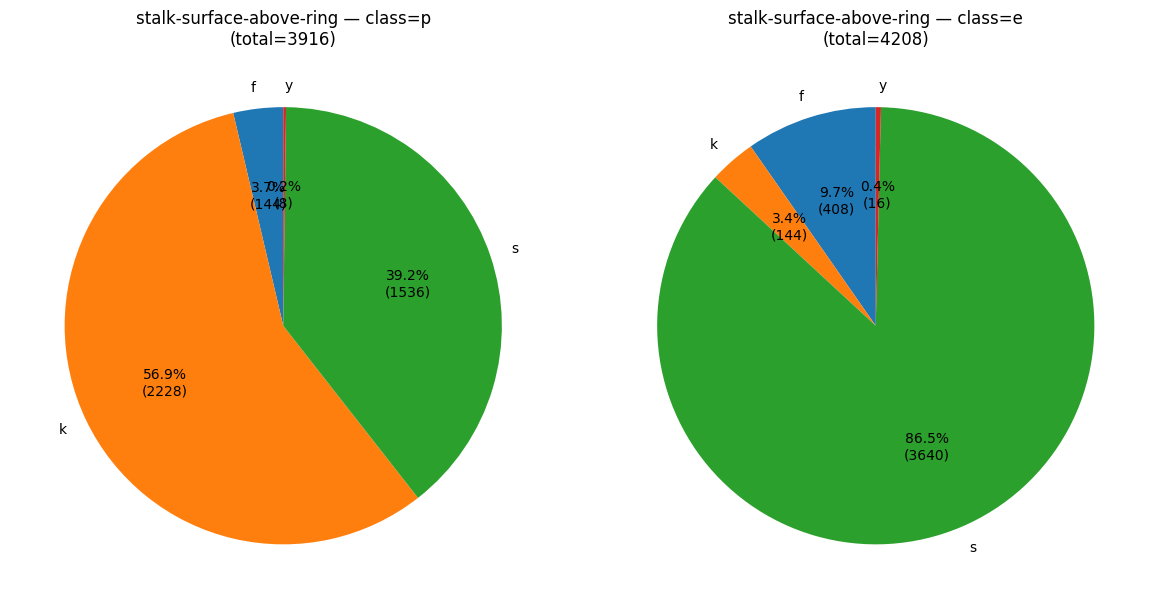

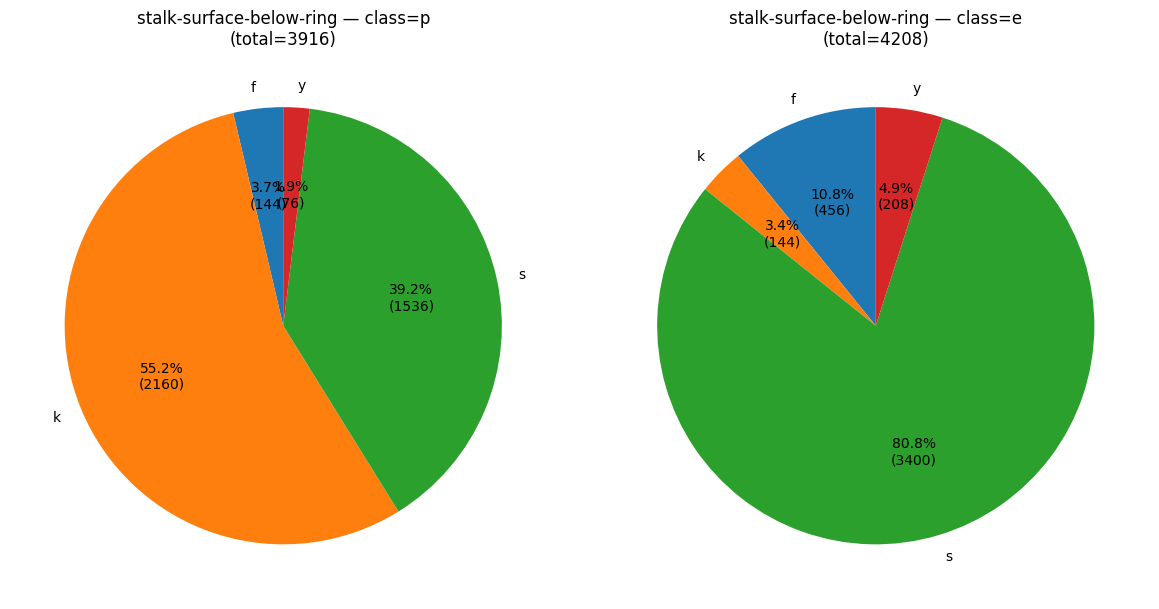

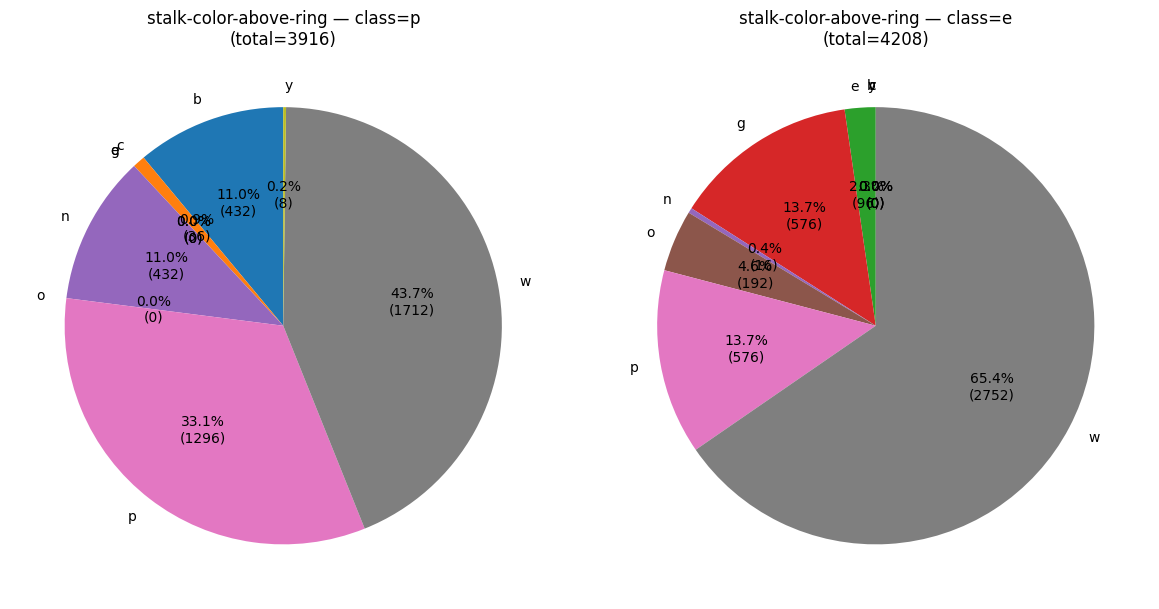

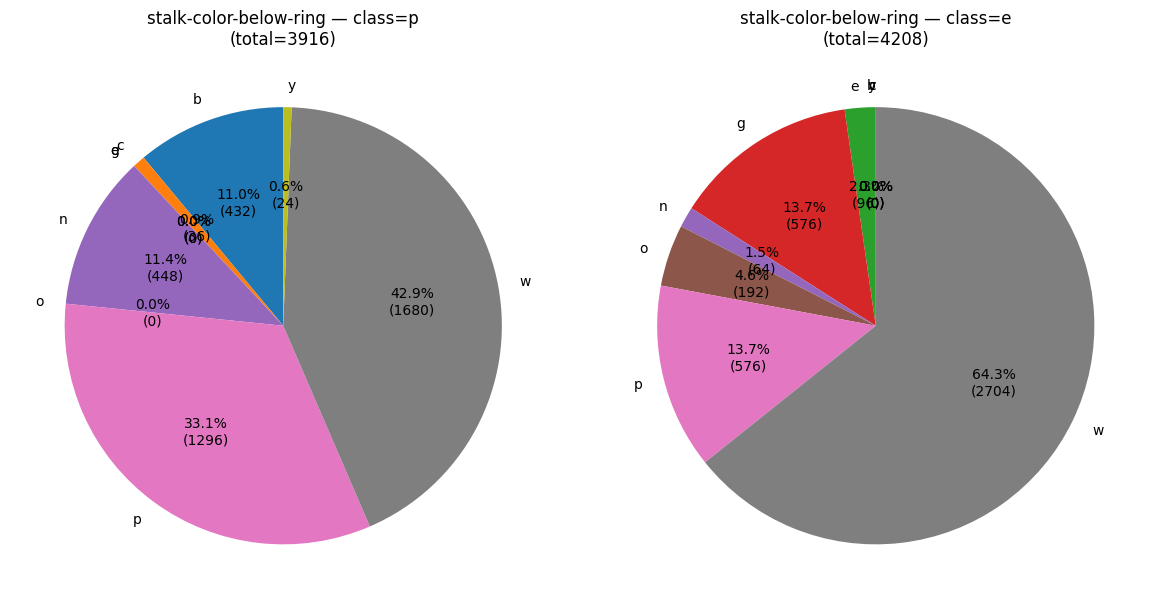

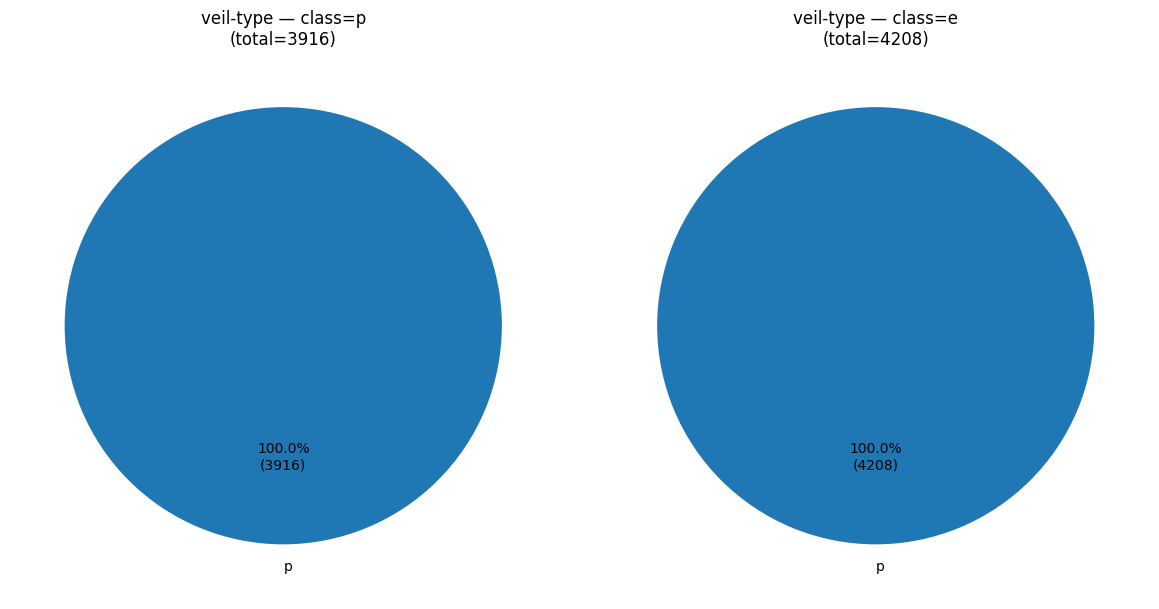

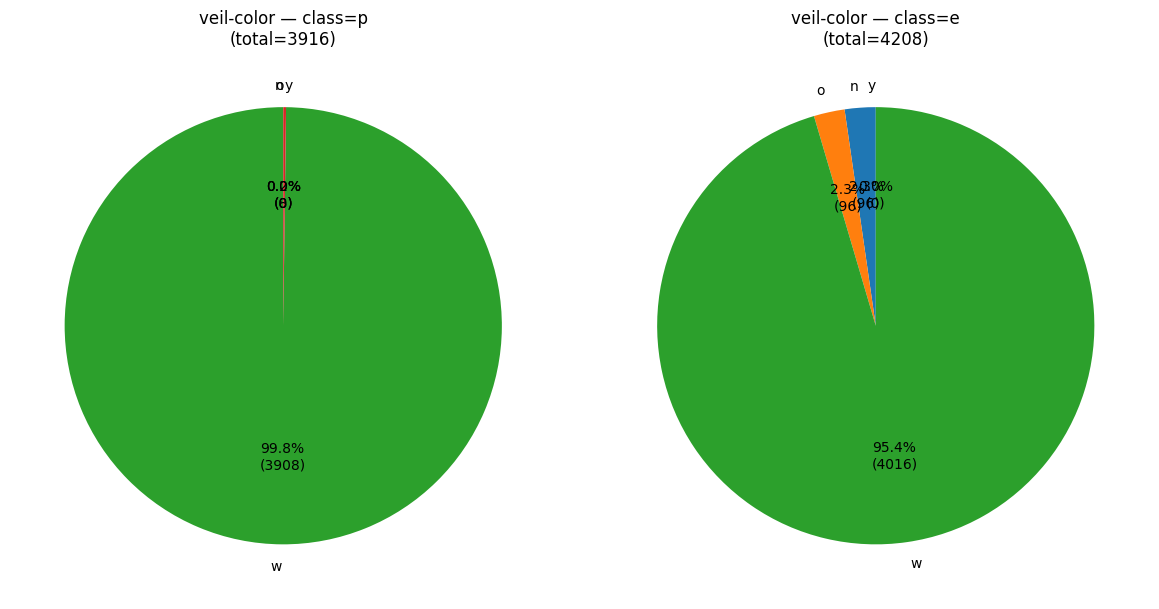

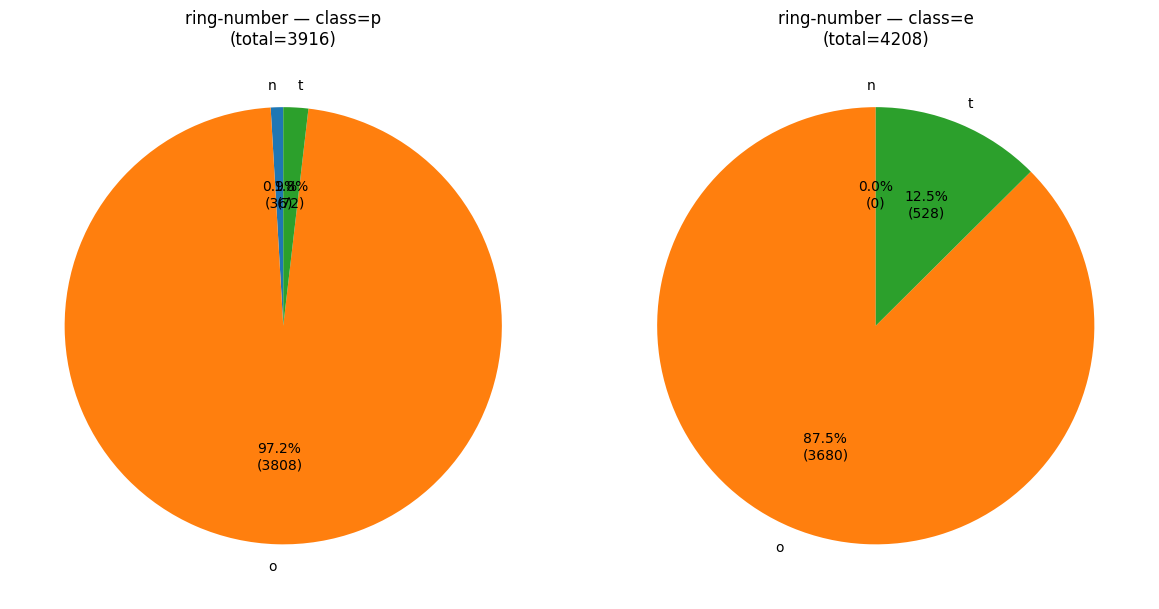

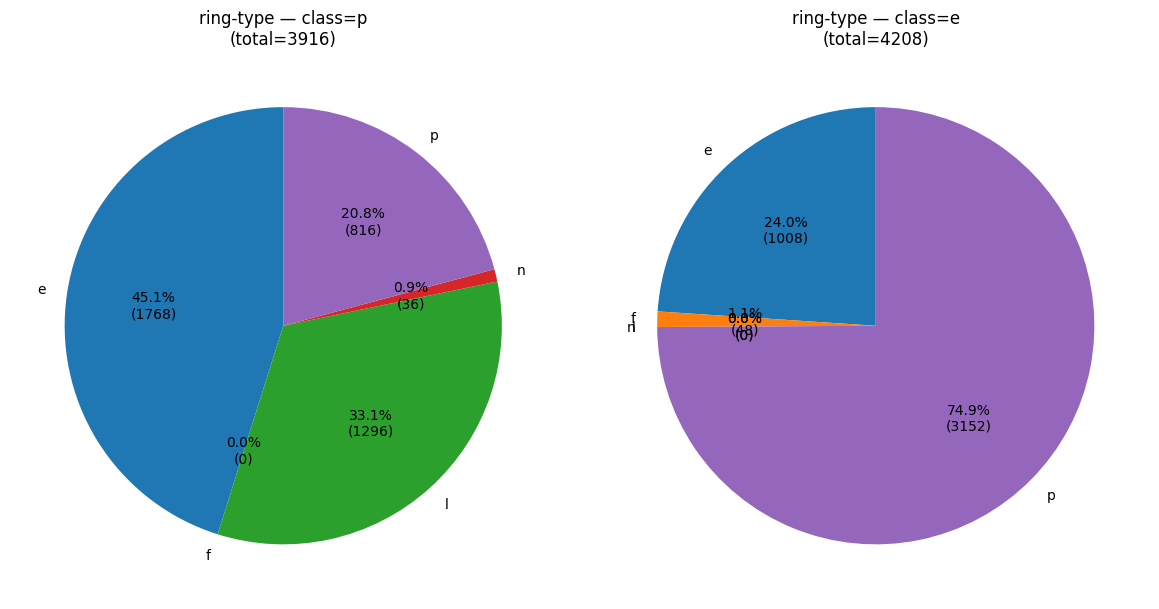

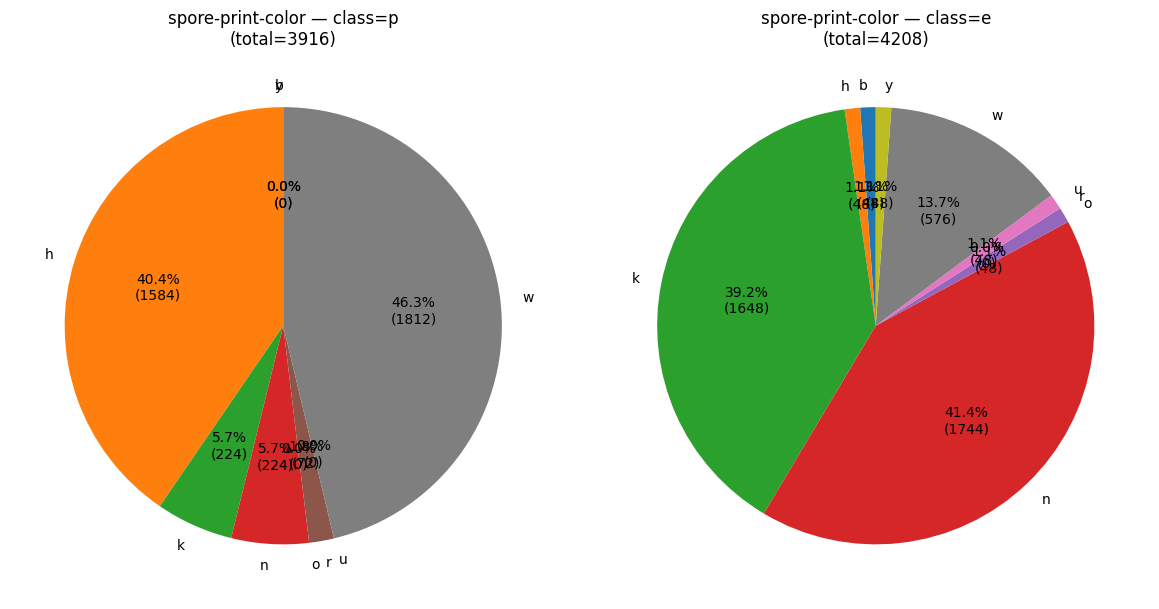

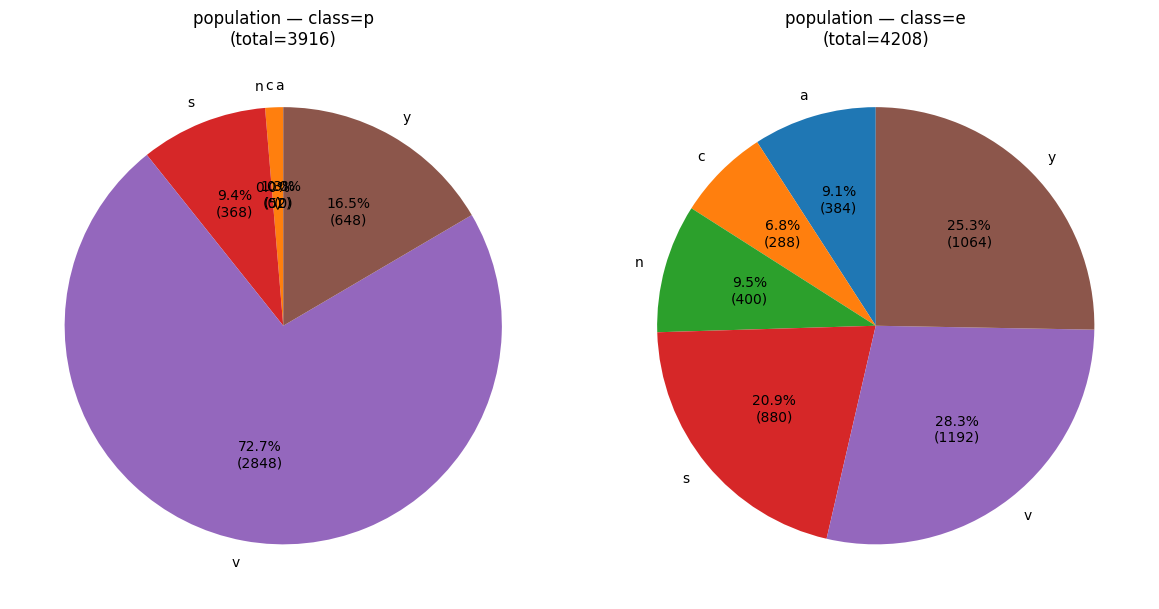

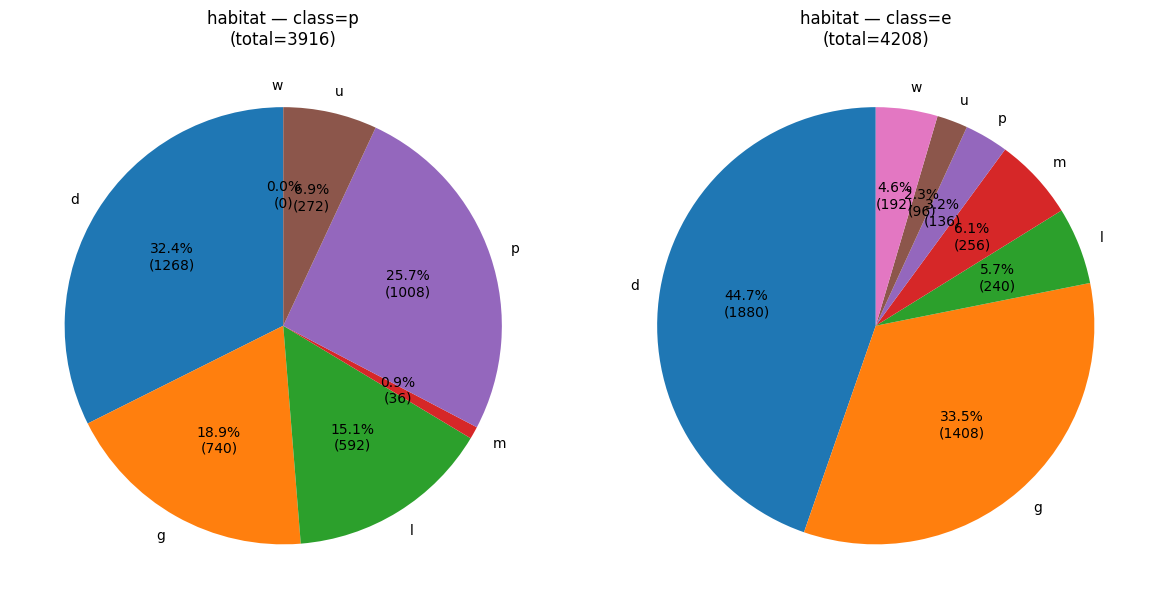

In [13]:
# elegir columnas categóricas (ajusta según necesites)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'class']

classes = df['class'].dropna().unique()

for col in cat_cols:
    # obtener todas las categorías posibles en la columna (para consistencia en ambos pies)
    all_labels = pd.Index(df[col].dropna().unique()).sort_values()
    counts_by_class = []
    for cl in classes:
        cnt = df.loc[df['class'] == cl, col].value_counts().reindex(all_labels).fillna(0)
        counts_by_class.append(cnt.values.astype(int))

    # plot
    n = len(classes)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 6))
    if n == 1:
        axes = [axes]
    for ax, cl, counts in zip(axes, classes, counts_by_class):
        # evitar pies vacíos
        if counts.sum() == 0:
            ax.text(0.5, 0.5, 'No hay datos', ha='center', va='center')
            ax.set_title(f"{col} — class={cl}\n(total=0)")
            ax.axis('off')
            continue
        wedges, texts, autotexts = ax.pie(
            counts,
            labels=all_labels,
            autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct * counts.sum() / 100))})",
            startangle=90
        )
        ax.set_title(f"{col} — class={cl}\n(total={int(counts.sum())})")
    plt.tight_layout()
    plt.show()